In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [9]:
#selecting Feature
feature = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']
X = train_data[feature]
y = train_data['SalePrice']

# Spiting the train data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_val)                           #Y prediction
mean_abs_err = mean_absolute_error(y_val, y_pred)       #Mean Absolute Error
mean_sq_err = mean_squared_error(y_val, y_pred)         #Mean Square Error
r2_scr = r2_score(y_val, y_pred)  #r2 Score
mean_abs_err
#mean_sq_err
#r2_scr

36073.13878245481

In [16]:
mean_sq_err

2809126045.9448586

In [17]:
r2_scr

0.6337670693441048

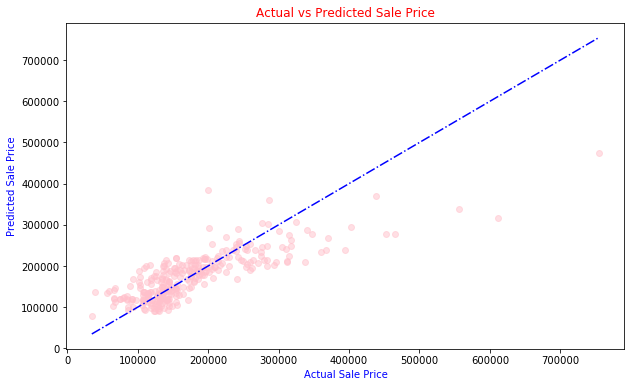

In [21]:
plt.figure(figsize=(10, 6))                             #Ploting Actual vs Predicted Sales Price
plt.scatter(y_val, y_pred, alpha=0.5, color='pink', edgecolors='pink')
plt.xlabel('Actual Sale Price', color='blue')
plt.ylabel('Predicted Sale Price', color='blue')
plt.title('Actual vs Predicted Sale Price', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b-.')
plt.show()


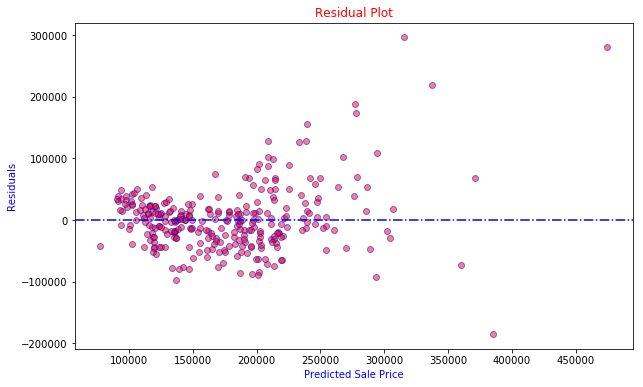

In [22]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Predicted Sale Price', color='blue')
plt.ylabel('Residuals', color='blue')
plt.title('Residual Plot', color='red')
plt.axhline(y=0, color='b', linestyle='-.')
plt.show()


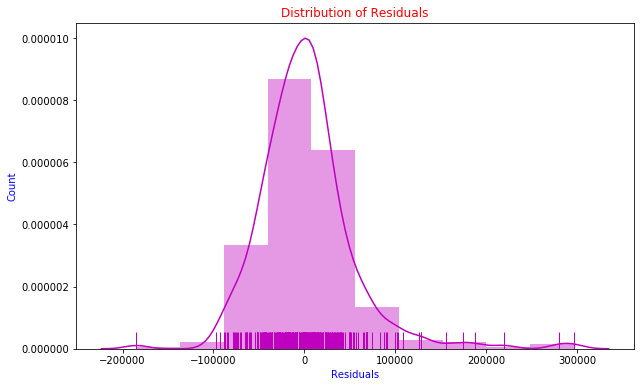

In [29]:
plt.figure(figsize=(10, 6))
sns.distplot(residuals, kde=True, color="m",hist=True, bins=10,
             rug=True)
plt.xlabel('Residuals', color='b')
plt.ylabel('Count', color='b')
plt.title('Distribution of Residuals', color='r')
plt.show()

In [32]:
ex_data = {'GrLivArea':[1000],'BedroomAbvGr':[5],'FullBath':[1],'HalfBath':[3],'TotRmsAbvGrd':[4]}
example = pd.DataFrame(ex_data)
example_prediction = model.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

X_test = test_data[feature]
test_predictions = model.predict(X_test)

pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
pred.to_csv('Predictions.csv', index=False)


Example Prediction: $57,750.24
